In [1]:
import random
import numpy as np

def measurments(rssi, x_axis):
    sigma = 3

    g = []
    for x in x_axis:
        rnd_gaus = random.gauss(rssi,sigma)
        g.append(rnd_gaus)

    return np.asarray(g)

In [2]:
import matplotlib.pyplot as plt

def plot(x_axis, values, filtered):
    plt.figure()
    plt.plot(x_axis, values, 'bo', label='Signal')
    plt.plot(x_axis, filtered, 'r', label='Kalman')
    plt.legend()

This example shows how the Kalman Filter can flatten a noisy RSSI signal.

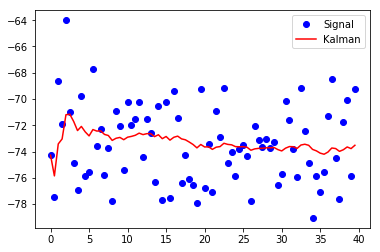

In [3]:
from kalman_filter import KalmanFilter

R = 0.01
Q = 3

kalman = KalmanFilter(R, Q)

x_axis = np.arange(0, 40, 0.5)

RSSI = -73
measurements = measurments(RSSI, x_axis)

filtered = []
for f in measurements:
    filtered.append(kalman.filter(f))
    
plot(x_axis, measurements, filtered)